<a href="https://colab.research.google.com/github/Maro94/175IC-machine-learning/blob/main/lab33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from   sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


np.random.seed(42)
df_raw=pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

df=df_raw.copy()
df.info()
#usuwanie duplikatow
df[df.duplicated()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


no     1064
yes     274
Name: smoker, dtype: int64

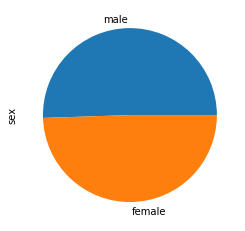

In [3]:
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()

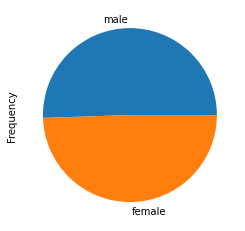

In [4]:
import plotly.express as px
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist',bins=30)
px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')


In [5]:
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [6]:
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies
corr=df_dummies.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


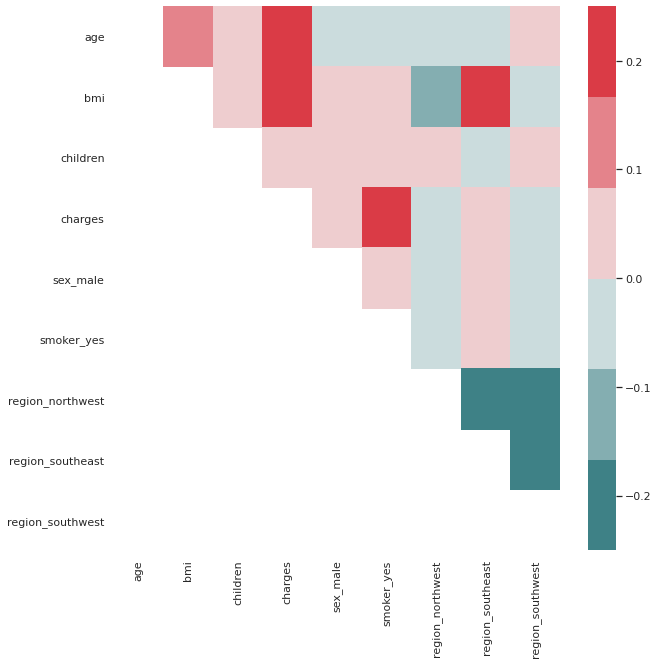

In [7]:
sns.set(style='white')  #biale tlo dla wykresu
mask=np.zeros_like(corr) #tworzymy zerowa maske o wielkosci cor
mask[np.tril_indices_from(mask)]=1#ustawiamy 1 wwartosciach ktore sie powtarzaja
plt.subplots(figsize=(10,10)) #wielkosc wykresu
cmap=sns.diverging_palette(200,10) #ustawiamy gradient kolorow(empirycznie)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.25,vmin=-0.25) #wyswietlamy mape ciepla




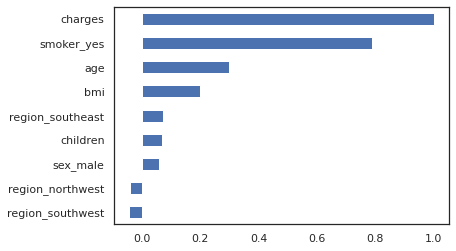

In [8]:
df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')


In [41]:
 from sklearn.model_selection import train_test_split
df1=df_dummies['charges']
df2=df_dummies.drop(columns='charges')
x_train, x_test, y_train, y_test = train_test_split(df1,df2,test_size=0.3)
print(df1)
print(df2)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
      age     bmi  ...  region_southeast  region_southwest
0      19  27.900  ...                 0                 1
1      18  33.770  ...                 1                 0
2      28  33.000  ...                 1                 0
3      33  22.705  ...                 0                 0
4      32  28.880  ...                 0                 0
...   ...     ...  ...               ...               ...
1333   50  30.970  ...                 0                 0
1334   18  31.920  ...                 0                 0
1335   18  36.850  ...                 1                 0
1336   21  25.800  ...                 0                 1
1337   61  29.070  ...                 0                 0

[1338 rows x 8 columns]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
r2_score = regressor.score(x_test, y_test)
print(f"R2 score: {r2_score:.4f}")


ValueError: ignored

In [45]:
y_pred = regressor.predict(x_test)
y_pred[:10]


NotFittedError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
x1=df_dummies['charges']
y1=df_dummies.drop(columns='charges')
X_train, X_test, y_train, y_test = train_test_split(x1,y1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred[:10]
y_true=y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error']=predictions['y_true']-predictions['y_pred']
predictions.head()

ValueError: ignored